In [ ]:
from atomate.vasp.database import VaspCalcDb

# create the atomate db from your db.json
PATH_TO_MY_DB_JSON = '/path/to/my/db.json'
atomate_db = VaspCalcDb.from_db_file(PATH_TO_MY_DB_JSON)

# get the uniform bandstructure entry from the database and
# use the get_dos method of the database to get the pymatgen CompleteDOS for that task id


In [1]:
%matplotlib inline

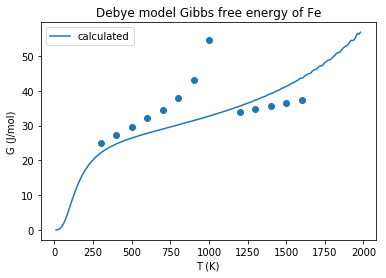

In [3]:
from atomate.vasp.database import VaspCalcDb
from pymatgen import Structure
import numpy as np

import matplotlib.pyplot as plt

# create the atomate db from your db.json
PATH_TO_MY_DB_JSON = 'db.json'
atomate_db = VaspCalcDb.from_db_file(PATH_TO_MY_DB_JSON)

# use the Gibbs collection
gibbs_coll = atomate_db.db['gibbs_tasks']

# get our task for the formula
gibbs_entry = gibbs_coll.find_one({'formula_pretty': 'Fe'})

# set up the pymatgen structure
struct = Structure.from_dict(gibbs_entry['structure'])

# Gibbs free energy data from Barin:
T_barin = [300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1300, 1400, 1500, 1600]
G_barin = []
CP_barin = [25.039, 27.365, 29.699, 32.063, 34.592, 37.943, 43.089, 54.534, 34.017, 34.852, 35.691, 36.525, 37.364]
eVatom_to_jmol = 96.485340095*1000

#plt.scatter(T_barin, G_barin, label='Barin tables (experiment)')
T = np.array(gibbs_entry['temperatures'])[:200]
G = np.array(gibbs_entry['gibbs_free_energy'])[:200]*eVatom_to_jmol
CP = -T[:-2]*np.gradient(np.gradient(G, 10), 10)[:-2]
plt.plot(T[:-2], CP, label='calculated')
plt.scatter(T_barin, CP_barin)
plt.title('Debye model Gibbs free energy of Fe')
plt.xlabel('T (K)')
plt.ylabel('G (J/mol)')
plt.legend()

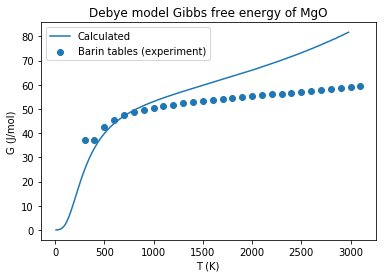

In [4]:
from atomate.vasp.database import VaspCalcDb
from pymatgen import Structure
import numpy as np

import matplotlib.pyplot as plt

eVatom_to_kjmol = 96.485340095*1000

# create the atomate db from your db.json
PATH_TO_MY_DB_JSON = 'db.json'
atomate_db = VaspCalcDb.from_db_file(PATH_TO_MY_DB_JSON)

# use the Gibbs collection
gibbs_coll = atomate_db.db['gibbs_tasks']

# get our task for the formula
gibbs_entry = gibbs_coll.find_one({'formula_pretty': 'MgO'})

# set up the pymatgen structure
struct = Structure.from_dict(gibbs_entry['structure'])

# Gibbs free energy data from Barin for MgO:
T_barin = range(300, 3200, 100)
G_barin = [-609.268, -609.318, -612.625, -616.998, -622.284, -628.363, -635.140, -642.540, -650.503, -658.978, -667.925, -677.308, -687.098, -697.268, -707.797, -718.664, -729.852, -741.344, -753.128, -765.191, -777.520, -790.105, -802.938, -816.008, -829.308, -842.830, -856.568, -870.515, -884.664]
Cp_barin = [37.110, 37.245, 42.560, 45.543, 47.430, 48.748, 49.741, 50.538, 51.209, 51.796, 52.324, 52.809, 53.264, 53.695, 54.109, 54.509, 54.898, 55.278, 55.651, 56.018, 56.381, 56.740, 57.095, 57.447, 57.797, 58.145, 58.836, 59.179, 59.521]

T_calc = np.array(gibbs_entry['temperatures'])
G_calc = np.array(gibbs_entry['gibbs_free_energy'])*eVatom_to_kjmol
Cp_calc = -T_calc[:-2]*np.gradient(np.gradient(G_calc, 10), 10)[:-2]

# Plot our calculated Gibbs free energies vs. those from Barin
plt.scatter(T_barin, Cp_barin, label='Barin tables (experiment)')
plt.plot(T_calc[:-2], Cp_calc, label='Calculated')
plt.title('Debye model Gibbs free energy of MgO')
plt.xlabel('T (K)')
plt.ylabel('G (J/mol)')
plt.legend()


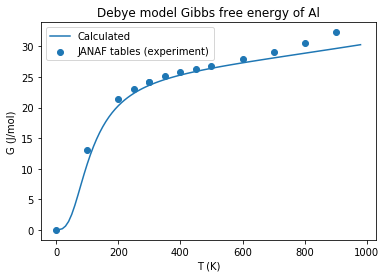

In [5]:
from atomate.vasp.database import VaspCalcDb
from pymatgen import Structure
import numpy as np

import matplotlib.pyplot as plt

eVatom_to_kjmol = 96.485340095*1000

# create the atomate db from your db.json
PATH_TO_MY_DB_JSON = 'db.json'
atomate_db = VaspCalcDb.from_db_file(PATH_TO_MY_DB_JSON)

# use the Gibbs collection
gibbs_coll = atomate_db.db['gibbs_tasks']

# get our task for the formula
gibbs_entry = gibbs_coll.find_one({'formula_pretty': 'Al'})

# set up the pymatgen structure
struct = Structure.from_dict(gibbs_entry['structure'])

# Gibbs free energy data from Barin for Al:
T_barin = [0, 100, 200, 250, 298.15, 300, 350, 400, 450, 500, 600, 700, 800, 900]
Cp_barin = [0, 12.997, 21.338, 23.040, 24.209, 24.247, 25.113, 25.784, 26.335, 26.842, 27.886, 29.100, 30.562, 32.308],
         
T_calc = np.array(gibbs_entry['temperatures'])
G_calc = np.array(gibbs_entry['gibbs_free_energy'])*eVatom_to_kjmol
Cp_calc = -T_calc[:-2]*np.gradient(np.gradient(G_calc, 10), 10)[:-2]

# Plot our calculated Gibbs free energies vs. those from Barin
plt.scatter(T_barin, Cp_barin, label='JANAF tables (experiment)')
plt.plot(T_calc[:-2], Cp_calc, label='Calculated')
plt.title('Debye model Gibbs free energy of Al')
plt.xlabel('T (K)')
plt.ylabel('G (J/mol)')
plt.legend()


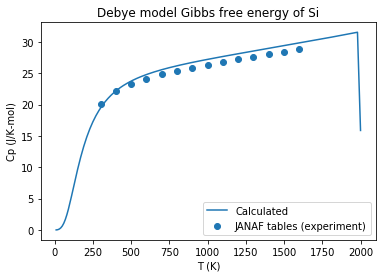

In [3]:
from atomate.vasp.database import VaspCalcDb
from pymatgen import Structure
import numpy as np

import matplotlib.pyplot as plt

# create the atomate db from your db.json
PATH_TO_MY_DB_JSON = 'db.json'
atomate_db = VaspCalcDb.from_db_file(PATH_TO_MY_DB_JSON)

# use the Gibbs collection
gibbs_coll = atomate_db.db['gibbs_tasks']

# get our task for the formula
gibbs_entry = gibbs_coll.find({'formula_pretty': 'Si'})
gibbs_entry = gibbs_entry[1]

# set up the pymatgen structure
struct = Structure.from_dict(gibbs_entry['structure'])
eVatom_to_kjmol = 96.485340095*1000/len(struct)

# Gibbs free energy data from Barin for Si:
T_barin = range(300, 1700, 100)
Cp_barin = [20.050, 22.142, 23.330, 24.154, 24.803, 25.359, 25.874, 26.338, 26.778, 27.196, 27.614, 28.033, 28.451, 28.870]

T_calc = np.array(gibbs_entry['temperatures'])
G_calc = np.array(gibbs_entry['gibbs_free_energy'])*eVatom_to_kjmol
Cp_calc = -T_calc*np.gradient(np.gradient(G_calc, 10), 10)

# Plot our calculated Gibbs free energies vs. those from Barin
plt.scatter(T_barin, Cp_barin, label='JANAF tables (experiment)')
plt.plot(T_calc, Cp_calc, label='Calculated')
plt.title('Debye model Gibbs free energy of Si')
plt.xlabel('T (K)')
plt.ylabel('Cp (J/K-mol)')
plt.legend()

plt.savefig('Si-heat-capacity.png')

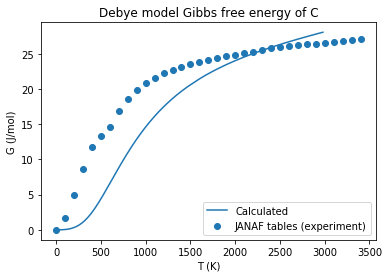

In [8]:
from atomate.vasp.database import VaspCalcDb
from pymatgen import Structure
import numpy as np

import matplotlib.pyplot as plt

eVatom_to_kjmol = 96.485340095*1000/len(struct)

# create the atomate db from your db.json
PATH_TO_MY_DB_JSON = 'db.json'
atomate_db = VaspCalcDb.from_db_file(PATH_TO_MY_DB_JSON)

# use the Gibbs collection
gibbs_coll = atomate_db.db['gibbs_tasks']

# get our task for the formula
gibbs_entry = gibbs_coll.find_one({'formula_pretty': 'C'})

# set up the pymatgen structure
struct = Structure.from_dict(gibbs_entry['structure'])

# Gibbs free energy data from Barin for C:
T_barin = range(0, 3500, 100)
Cp_barin = [0, 1.674, 5.006, 8.581, 11.817, 13.289, 14.623, 16.844, 18.537, 19.827, 20.824, 21.610, 22.244, 22.766, 23.204, 23.578, 
            23.904, 24.191, 24.448, 24.681, 24.895, 25.094, 25.278, 25.618, 25.775, 25.926, 26.071, 26.212, 26.348, 26.481, 26.611, 
           26.738, 26.863, 26.986, 27.106, ]

T_calc = np.array(gibbs_entry['temperatures'])
G_calc = np.array(gibbs_entry['gibbs_free_energy'])*eVatom_to_kjmol
Cp_calc = -T_calc[:-2]*np.gradient(np.gradient(G_calc, 10), 10)[:-2]

# Plot our calculated Gibbs free energies vs. those from Barin
plt.scatter(T_barin, Cp_barin, label='JANAF tables (experiment)')
plt.plot(T_calc[:-2], Cp_calc, label='Calculated')
plt.title('Debye model Gibbs free energy of C')
plt.xlabel('T (K)')
plt.ylabel('G (J/mol)')
plt.legend()


In [74]:
struct = Structure.from_dict(gibbs_entry['structure'])
struct.to(fmt='poscar')
Structure.from_str("""Al1
1.0
2.473329 0.000000 1.427977
0.824443 2.331877 1.427977
0.000000 0.000000 2.855955
Al
1
direct
0.000000 0.000000 0.000000 Al""", fmt='POSCAR')

Structure Summary
Lattice
    abc : 2.8559542459167657 2.8559542916347591 2.8559549999999998
 angles : 60.000003377925211 60.000002848386309 60.000002428463056
 volume : 16.471717630914863
      A : 2.4733290000000001 0.0 1.4279770000000001
      B : 0.82444300000000004 2.331877 1.4279770000000001
      C : 0.0 0.0 2.8559549999999998
PeriodicSite: Al (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]

Al1
Fitting E and V
37.7176096404
Fitting E and V
36.8419548248
Fitting E and V


/Users/brandon/.virtualenvs/atomate/lib/python3.6/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


EOS fitting failed, so skipping this data point, 1570.0
EOS fitting failed, so skipping this data point, 1580.0
EOS fitting failed, so skipping this data point, 1590.0
EOS fitting failed, so skipping this data point, 1600.0
EOS fitting failed, so skipping this data point, 1610.0
EOS fitting failed, so skipping this data point, 1620.0
EOS fitting failed, so skipping this data point, 1630.0
EOS fitting failed, so skipping this data point, 1640.0
EOS fitting failed, so skipping this data point, 1650.0
EOS fitting failed, so skipping this data point, 1660.0
EOS fitting failed, so skipping this data point, 1670.0
EOS fitting failed, so skipping this data point, 1680.0
EOS fitting failed, so skipping this data point, 1690.0
EOS fitting failed, so skipping this data point, 1700.0
EOS fitting failed, so skipping this data point, 1710.0
EOS fitting failed, so skipping this data point, 1720.0
EOS fitting failed, so skipping this data point, 1730.0
EOS fitting failed, so skipping this data point,

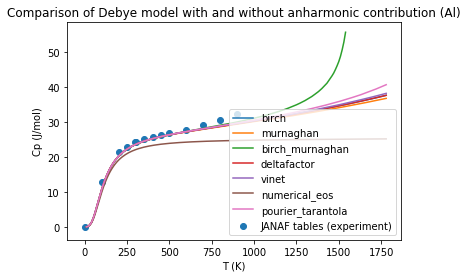

In [5]:
struct = Structure.from_dict(gibbs_entry['structure'])
print(struct.formula)
eVatom_to_jmol = 96.485340095*1000/len(struct)

for eos in ['birch', 'murnaghan', 'birch_murnaghan', 'deltafactor', 'vinet', 'numerical_eos', 'pourier_tarantola']:
    try:
        qha = QuasiharmonicDebyeApprox(gibbs_entry['energies'], gibbs_entry['volumes'], struct, t_min=10, t_step=10, t_max=1800, poisson=0.37, eos=eos, anharmonic_contribution=True)
    except:
        print('failed to fit {}'.format(eos))
    T = np.array(qha.temperatures)
    G = np.array(qha.gibbs_free_energy)*eVatom_to_jmol
    #G_h = np.array(gibbs_entry['gibbs_free_energy'])*eVatom_to_jmol
    plt.plot(T[:-2], -T[:-2]*np.gradient(np.gradient(G, 10), 10)[:-2], label=eos)
    print((-T[:-2]*np.gradient(np.gradient(G, 10), 10)[:-2])[-1])
plt.scatter([0, 100, 200, 250, 298.15, 300, 350, 400, 450, 500, 600, 700, 800, 900],
         [0, 12.997, 21.338, 23.040, 24.209, 24.247, 25.113, 25.784, 26.335, 26.842, 27.886, 29.100, 30.562, 32.308],
         label='JANAF tables (experiment)')

plt.title('Comparison of Debye model with and without anharmonic contribution (Al)')
plt.xlabel('T (K)')
plt.ylabel('Cp (J/mol)')
plt.legend()

In [1]:
struct = Structure.from_dict(gibbs_entry['structure'])
print(struct.formula)
eVatom_to_jmol = 96.485340095*1000/len(struct)

for eos in ['birch', 'murnaghan', 'birch_murnaghan', 'deltafactor', 'vinet', 'numerical_eos', 'pourier_tarantola']:
    try:
        qha = QuasiharmonicDebyeApprox(gibbs_entry['energies'], gibbs_entry['volumes'], struct, t_min=10, t_step=10, t_max=1800, poisson=0.37, eos=eos, anharmonic_contribution=True)
    except:
        print('failed to fit {}'.format(eos))
    T = np.array(qha.temperatures)
    G = np.array(qha.gibbs_free_energy)*eVatom_to_jmol
    #G_h = np.array(gibbs_entry['gibbs_free_energy'])*eVatom_to_jmol
    #plt.plot(T[:-2], -T[:-2]*np.gradient(np.gradient(G, 10), 10)[:-2], label=eos)
    plt.plot(T, G, label=eos)
    print((-T[:-2]*np.gradient(np.gradient(G, 10), 10)[:-2])[-1])
plt.scatter([0, 100, 200, 250, 298.15, 300, 350, 400, 450, 500, 600, 700, 800, 900],
         [0, 12.997, 21.338, 23.040, 24.209, 24.247, 25.113, 25.784, 26.335, 26.842, 27.886, 29.100, 30.562, 32.308],
         label='JANAF tables (experiment)')

plt.title('Comparison of Debye model with and without anharmonic contribution (Al)')
plt.xlabel('T (K)')
plt.ylabel('Cp (J/mol)')
plt.legend()

NameError: name 'Structure' is not defined

In [6]:
gibbs_entry = atomate_db.collection.find_one({'natoms':4})

Full Formula (Al1 Ni3)
Reduced Formula: AlNi3
abc   :   3.561605   3.561910   3.561910
angles:  90.000000  90.000000  90.000000
Sites (4)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Al    0    0    0
  1  Ni    0    0.5  0.5
  2  Ni    0.5  0    0.5
  3  Ni    0.5  0.5  0
Al1 Ni3
Fitting E and V
120.376165969
Fitting E and V
119.470932208
Fitting E and V
124.937721588
Fitting E and V
120.499000183
Fitting E and V
120.851544017
Fitting E and V
100.14873312
Fitting E and V
121.367992476


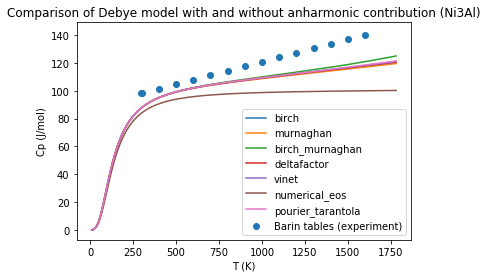

In [9]:
struct = Structure.from_dict(gibbs_entry['structure'])
print(struct)
eVatom_to_jmol = 96.485340095*1000
print(struct.formula)
for eos in ['birch', 'murnaghan', 'birch_murnaghan', 'deltafactor', 'vinet', 'numerical_eos', 'pourier_tarantola']:
    try:
        qha = QuasiharmonicDebyeApprox(gibbs_entry['energies'], gibbs_entry['volumes'], struct, t_min=10, t_step=10, t_max=1800, poisson=0.37, eos=eos, anharmonic_contribution=True)
    except:
        print('failed to fit {}'.format(eos))
    T = np.array(qha.temperatures)
    G = np.array(qha.gibbs_free_energy)*eVatom_to_jmol
    #G_h = np.array(gibbs_entry['gibbs_free_energy'])*eVatom_to_jmol
    plt.plot(T[:-2], -T[:-2]*np.gradient(np.gradient(G, 10), 10)[:-2], label=eos)
    print((-T[:-2]*np.gradient(np.gradient(G, 10), 10)[:-2])[-1])
plt.scatter([298.15, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600],
         np.array([98.097, 98.157, 101.374, 104.600, 107.822, 111.043, 114.265, 117.487, 120.708, 123.930, 127.152, 130.373, 133.595, 136.817, 140.038]),
         label='Barin tables (experiment)')

plt.title('Comparison of Debye model with and without anharmonic contribution (Ni3Al)')
plt.xlabel('T (K)')
plt.ylabel('Cp (J/mol)')
plt.legend()

Ni1
Fitting E and V
32.17890719
Fitting E and V
33.0236168995
Fitting E and V
28.2574636536
Fitting E and V
32.1793596232
Fitting E and V
31.8287215749
Fitting E and V
32.7204860339
Fitting E and V
30.8667791129


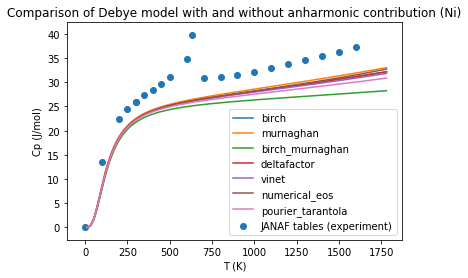

In [10]:
struct = Structure.from_str("""FCC Ni                                     
    3.520000000000000     
     0.5001185932512424    0.5001185932512424    0.0000000000000000
     0.0000000000000000    0.5001185932512424    0.5001185932512424
     0.5001185932512424    0.0000000000000000    0.5001185932512424
   Ni 
   1
Direct
  0.0000000000000000  0.0000000000000000  0.0000000000000000""", fmt='POSCAR')
volumes = [9.062722,
9.653618,
10.269656,
10.911360,
11.579253,
12.273860,
12.995704,
13.745093,
14.522975]



energies = [-.52932753E+01,
-.54583333E+01,
-.55469971E+01,
-.55749073E+01,
-.55545673E+01,
-.54962005E+01,
-.54083930E+01,
-.52981553E+01,
-.51707601E+01,]

print(struct.formula)
eVatom_to_jmol = 96.485340095*1000/len(struct)

for eos in ['birch', 'murnaghan', 'birch_murnaghan', 'deltafactor', 'vinet', 'numerical_eos', 'pourier_tarantola']:
    try:
        qha = QuasiharmonicDebyeApprox(energies, volumes, struct, t_min=10, t_step=10, t_max=1800, poisson=0.37, eos=eos, anharmonic_contribution=True)
    except:
        print('failed to fit {}'.format(eos))
    T = np.array(qha.temperatures)
    G = np.array(qha.gibbs_free_energy)*eVatom_to_jmol
    plt.plot(T[:-2], -T[:-2]*np.gradient(np.gradient(G, 10), 10)[:-2], label=eos)
    print((-T[:-2]*np.gradient(np.gradient(G, 10), 10)[:-2])[-1])
plt.scatter([0, 100, 200, 250, 298.15, 300, 350, 400, 450, 500, 600, 631, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600],
         [0, 13.631, 22.468, 24.397, 25.987, 26.024, 27.294, 28.493, 29.623, 31.045, 34.853, 39.832, 30.794, 31.003, 31.589, 32.217, 32.928, 33.681, 34.518, 35.397, 36.317, 37.279],
         label='JANAF tables (experiment)')

plt.title('Comparison of Debye model with and without anharmonic contribution (Ni)')
plt.xlabel('T (K)')
plt.ylabel('Cp (J/mol)')
plt.legend()

In [65]:
struct.composition.reduced_formula

'Ni'

In [80]:
qha = QuasiharmonicDebyeApprox(gibbs_entry['energies'], gibbs_entry['volumes'], struct, t_min=500, t_max=500, eos='vinet')

Fitting E and V
2.18830193338


In [84]:
qha.debye_temperature(opt_volume)

601.23909670371813

In [83]:
opt_volume = 17.216094889116807

In [89]:
qha.vibrational_free_energy(500, opt_volume)

-0.014620023969247926